In [4]:
from sklearn.model_selection import KFold
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from joblib import Parallel,delayed
from celer import GroupLasso
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from joblib import Parallel,delayed
import seaborn as sns
import pandas as pd
import warnings
import cvxpy as cp
from helpers import *
import random
warnings.filterwarnings('ignore')


df96 = pd.read_csv('empirical_data/X_full.csv')
dff96 = df96[df96.columns[1:]]
fama285_ = pd.read_csv('empirical_data/Fama285.csv')
fama285_['Unnamed: 0'] = df96['Unnamed: 0']
fama285 = fama285_[fama285_.columns[1:]]

finally_choose = []             
chosen_set =[]



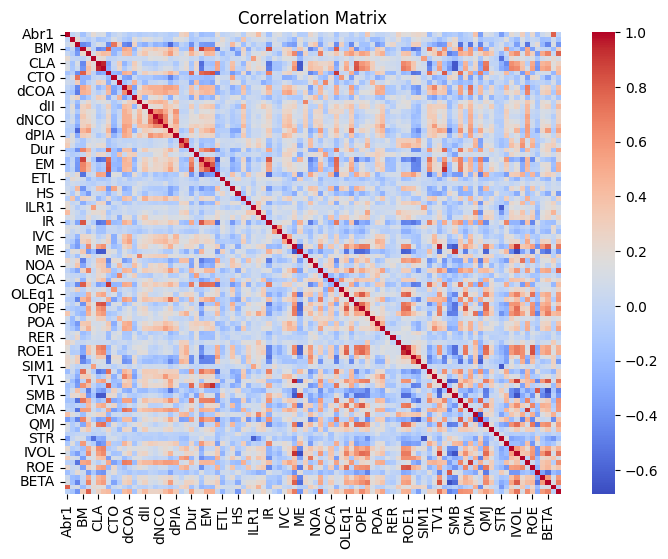

In [5]:
corr_matrix = dff96.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
np.sum(np.abs(corr_matrix),axis=1).sort_values()

ETR       5.154312
LIQ       6.128016
RER       8.145797
SIM1      8.453777
ISFF1     8.572172
           ...    
TV1      29.146610
IVOL     29.498865
EBP      29.573856
IVq1     29.626595
FIN      30.732520
Length: 96, dtype: float64

In [7]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
sharpe_ratio = np.mean(dff96,axis=0) / np.std(dff96,axis=0)
dataframe=pd.DataFrame({'Column1': df96.columns[1:], 'Column2': sharpe_ratio})
print(dataframe.sort_values('Column2'))

      Column1   Column2
BETA     BETA -0.019322
ME         ME  0.025929
DP         DP  0.036671
TV1       TV1  0.038989
EBP       EBP  0.053519
...       ...       ...
Abr1     Abr1  0.214854
dROE1   dROE1  0.225194
BAB       BAB  0.248454
PEAD     PEAD  0.319958
REG       REG  0.388557

[96 rows x 2 columns]


In [ ]:
chosen_set = []
knum=9
dfff = dff96[:36*12]
Z = np.float64(dfff)
chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff96.columns[chosen_set]))